# Week 11: PyTorch


Pytorch is a popular deep learning framework and it's easy to get started. Most of the materials of this tutorial are taken from the [tutorials at pytorch website](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), [pytorch tutorial on torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html), [Pytorch Tutorial](https://www.learnpytorch.io/), [RNN Tutorial](https://github.com/dair-ai/pytorch_notebooks/tree/master), [MNIST application tutorial](https://towardsdatascience.com/an-actual-application-for-the-mnist-digits-classifier-bbd76548bf2f), and [this tutorial](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627).

Learning Outcomes:

- Basic concepts of PyTorch
  - Tensors
  - Basic Operations
  - Autograd
  - GPU support
- Simple Neural Network
  - Network Structure
  - Loss Function
  - Optimizer
  - Training
- Simple RNNS
  - Network Structure
  - Loss Function
  - Optimizer
  - Training

## Importing PyTorch

> **Note:** Before running any of the code in this notebook, you should have gone through the [PyTorch setup steps](https://pytorch.org/get-started/locally/).
>
> However, **if you're running on Google Colab**, everything should work (Google Colab comes with PyTorch and other libraries installed).

<a href="https://drive.google.com/file/d/1NC64NDOONBzZFx8uiVpV9Z06so60ITih/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [2]:
import torch

torch.__version__  # for CPU version, the version ends with +cpu; for GPU version, the version ends with +cuXXX (e.g., +cu121)

'2.1.2+cu121'

In [4]:
print(
    torch.cuda.is_available()
)  # check if GPU is available, if not, you may need to install the GPU version of PyTorch

True


In [5]:
# import other necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba


import time

from tqdm import tqdm  # this is mainly for displaying the progress bar
from sklearn.model_selection import train_test_split

## Introduction to tensors

Now we've got PyTorch imported, it's time to learn about tensors. Tensors are the fundamental building block of machine learning. Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

<div style="text-align:center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png" alt="example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width" style="width:800pt">
</div>

The tensor for this image would have three dimensions, one for `colour_channels`, `height` and `width`.

Let's learn more about tensors by coding them.


### Creating tensors

You may turn to the [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) document page for more details.

The first thing we're going to create is a **scalar**.


In [6]:
# Scalar
scalar = torch.tensor(7)
scalar, scalar.item(), scalar.ndim

(tensor(7), 7, 0)

Okay, now let's see a **vector**. A vector is a single dimension tensor but can contain many numbers.

As in, you could have a vector `[3, 2]` to describe `[bedrooms, bathrooms]` in your house. Or you could have `[3, 2, 2]` to describe `[bedrooms, bathrooms, car_parks]` in your house.


In [11]:
# Vector
vector = torch.tensor([7, 7])
vector, vector.ndim, vector.shape, vector[1]

(tensor([7, 7]), 1, torch.Size([2]), tensor(7))

Let's now see a **matrix**.


In [19]:
# Matrix
MATRIX = torch.tensor([[7, 8], [9, 10]])
MATRIX, MATRIX.ndim, MATRIX.shape, MATRIX[1, 1]

(tensor([[ 7,  8],
         [ 9, 10]]),
 2,
 torch.Size([2, 2]),
 tensor(10))

In [20]:
# Tensor, actually tensor contains all the above
TENSOR = torch.tensor([[[1, 2, 3], [3, 6, 9], [2, 4, 5]]])
TENSOR, TENSOR.ndim, TENSOR.shape, TENSOR[0, 1, 2]

(tensor([[[1, 2, 3],
          [3, 6, 9],
          [2, 4, 5]]]),
 3,
 torch.Size([1, 3, 3]),
 tensor(9))

Let's summarise.

| Name       | What is it?                                                                                   | Number of dimensions                                                                  | Lower or upper (usually/example) |
| ---------- | --------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- | -------------------------------- |
| **scalar** | a single number                                                                               | 0                                                                                     | Lower (`a`)                      |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1                                                                                     | Lower (`y`)                      |
| **matrix** | a 2-dimensional array of numbers                                                              | 2                                                                                     | Upper (`Q`)                      |
| **tensor** | an n-dimensional array of numbers                                                             | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`)                      |

But remember that tensor can only have one data type (possible data types are `float`, `int`, `bool`, etc.). If you try to create a tensor with multiple data types, PyTorch will change all the data types to the most appropriate one.

In practice, pytorch.tensor provides a lot of functionalities. For example, you can create a tensor with random numbers, zeros, ones, etc. You can also convert a numpy array to a tensor and vice versa. You can regard pytorch tensor as a numpy array with GPU support and most functions of numpy are also supported in pytorch tensor.


In [21]:
# Create a random tensor of size (3, 4), this is commonly used in deep learning to initialize weights
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.1029, 0.0191, 0.2799, 0.7793],
         [0.7842, 0.3980, 0.2345, 0.8761],
         [0.8995, 0.8919, 0.0882, 0.8366]]),
 torch.float32)

In [22]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [25]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [26]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Tensor Operations

#### Basic Operations

You can operate on tensors in the ways you would expect. These operations are often a wonderful dance between:

- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix multiplication


In [27]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [28]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [33]:
# Divide it by 2
tensor / 2

tensor([0.5000, 1.0000, 1.5000])

In [30]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [34]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [32]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


#### Matrix multiplication (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html). You can understand it as doing a `dot product in linear algebra`.

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:

- `(3, 2) @ (3, 2)` won't work
- `(2, 3) @ (3, 2)` will work
- `(3, 2) @ (2, 3)` will work

2. The resulting matrix has the shape of the **outer dimensions**:

- `(2, 3) @ (3, 2)` -> `(2, 2)`
- `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.


In [59]:
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [60]:
# compare the element-wise multiplication with the matrix multiplication
print("Element-wise multiplication", tensor * tensor)
print(
    "Matrix multiplication:", torch.matmul(tensor, tensor)
)  # here because the tensor is 1D, we do not need to transpose it

Element-wise multiplication tensor([1, 4, 9])
Matrix multiplication: tensor(14)


In [62]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

#### One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.


In [42]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10], [8, 11], [9, 12]], dtype=torch.float32)

try:
    torch.matmul(tensor_A, tensor_B)  # (this will error)
except Exception as e:
    print(e)

mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)


We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their **inner dimensions match**.

One of the ways to do this is with a transpose (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:

- `torch.transpose(input, dim0, dim1)` - where input is the desired tensor to transpose and dim0 and dim1 are the dimensions to be swapped.

- `tensor.T` - where tensor is the desired tensor to transpose.


In [66]:
# View tensor_A and tensor_B.T and try again
tensor_A, tensor_B.T, torch.transpose(tensor_B, 0, 1), torch.matmul(
    tensor_A, torch.transpose(tensor_B, 0, 1)
)

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 tensor([[ 7.,  8.,  9.],
         [10., 11., 12.]]),
 tensor([[ 7.,  8.,  9.],
         [10., 11., 12.]]),
 tensor([[ 27.,  30.,  33.],
         [ 61.,  68.,  75.],
         [ 95., 106., 117.]]))

### PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

- [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor.

- [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

Let's try them out.


In [69]:
# NumPy array to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [70]:
# Tensor to NumPy array
tensor = torch.ones(7)  # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy()  # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Autograd

One of the main reasons for using PyTorch in Deep Learning projects is that we can **automatically get gradients/derivatives of functions that we define**. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables (“values”); in that case we talk about **gradients**. It’s a more general term.

Given an input $\mathcal{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

**Note: Why do we want gradients**? Consider that we have defined a function, a neural net, that is supposed to compute a certain output $\mathcal{x}$ for an input vector
. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $x$. Based on this error measure, we can use the gradients to update the weights $W$ that were responsible for the output, so that the next time we present input $\mathcal{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.


In [128]:
x = torch.ones((3,))
print(x.requires_grad)

# you can set requires_grad when creating a tensor
y = torch.ones((3,), requires_grad=True)

# or later
x.requires_grad_(True)

print(x.requires_grad, y.requires_grad)

False
True True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$
y = \frac{1}{l(x)}\sum_{i}[(x_i + 2)^2 + 3]
$$

where we use $l(x)$ to denote **the number of elements in $x$**. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to **obtain the gradients $\partial{y}/\partial{x}$**. For our example, we’ll use $[0,1,2]$ as our input.


In [135]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let’s build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.


In [136]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<div style="text-align:center">
<img src="https://uvadlc-notebooks.readthedocs.io/en/latest/_images/pytorch_computation_graph.svg" alt="computation graph" style="width:250pt;">
</div>

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:


In [141]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:


In [143]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\cdot\frac{\partial c_i}{\partial b_i}\cdot\frac{\partial b_i}{\partial a_i}\cdot\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Thus,

$$
\frac{\partial y}{\partial x_i} = \frac{1}{3} \cdot 1 \cdot 2a_i \cdot 1 = \frac{2a_i}{3} = \frac{2x_i + 4}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

However, tracking the operations through tensors consumes memory. Hence, unless we require the gradient of some final output/cost function, we should avoid tracking operations. These parameters that don't compute gradients are also called frozen parameters.

This is helpful if we know that we don't need the gradients of some parameters in advance, for example when performing fine-tuning on the output layer or when simply using the model for prediction.

- To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being
  tracked.

- You can also stop autograd from tracking history on Tensors by wrapping the code block in `with torch.no_grad():`.


In [146]:
print(x.requires_grad)
# use detach to get a tensor without grad
x_no_grad = x.detach()
print(x_no_grad.requires_grad)

True
False


In [147]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


### GPU support

**By default, all tensors you create are stored on the CPU**. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows:


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)
print(device)

cuda


In [149]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:


In [150]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
# Milliseconds to seconds
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")

CPU time: 0.48381s
GPU time: 0.03314s


## Application: Continuous XOR

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using Tensors (with requires_grad=True), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have **a lot of parameters**. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient.

The **continuous XOR problem** is a simple problem that can be used to test the capabilities of a neural network. The problem is defined as follows:

Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases. The example became famous by the fact that a single neuron, i.e. a linear classifier, cannot learn this simple function.
Hence, we will learn how to build a small neural network that can learn this function.
To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

<center style="width: 100%"><img src="https://raw.githubusercontent.com/phlippe/uvadlc_notebooks/master/docs/tutorial_notebooks/tutorial2/continuous_xor.svg" width="350px"></center>


### Dataset Creation

PyTorch provides a few functionalities to load the training and test data efficiently, summarized in the package `torch.utils.data`.


In [29]:
import torch.utils.data as data

#### The dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:


In [5]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x = y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [94]:
dataset = XORDataset(size=20000)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 20000
Data point 0: (tensor([ 1.0733, -0.0168]), tensor(1))


Let's visualize the dataset to see what we are working with.


Text(0.5, 1.0, 'XOR Dataset')

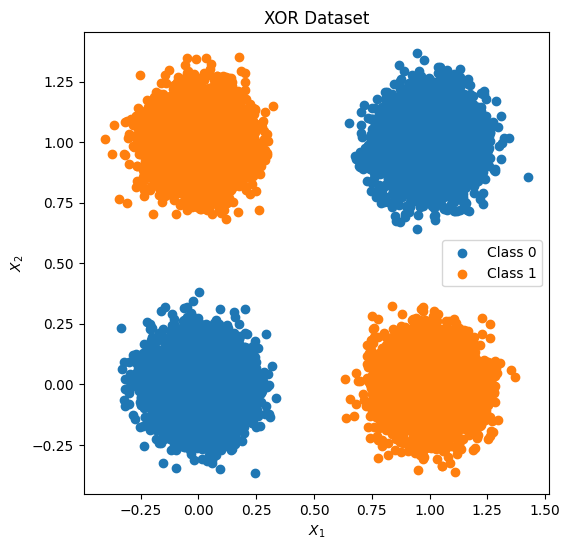

In [7]:
# visualize the dataset
data = dataset.data
label = dataset.label

plt.figure(figsize=(6, 6))

plt.scatter(data[label == 0, 0], data[label == 0, 1], label="Class 0")
plt.scatter(data[label == 1, 0], data[label == 1, 1], label="Class 1")

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

plt.legend()
plt.title("XOR Dataset")

#### Split the dataset


In [95]:
train_data, test_data, train_label, test_label = train_test_split(
    dataset.data, dataset.label, test_size=0.2, random_state=42
)

len(train_data), len(test_data)

(16000, 4000)

### Neural Network Model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found [here](https://pytorch.org/docs/stable/nn.html). In case you need a certain network layer, check the documentation of the package first before writing the layer yourself as the package likely contains the code for it already. Additionally to `torch.nn`, there is also `torch.nn.functional`. It contains functions that are used in network layers. This is in contrast to `torch.nn` which defines them as `nn.Modules` (more on it below), and `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`. Hence, the functional package is useful in many situations, and so we import it as well here. We import it below:


In [30]:
import torch.nn as nn
import torch.nn.functional as F

In PyTorch, **a neural network is built up out of modules**. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:


In [10]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted.

#### Network Structure

We can now make use of the pre-defined modules in the `torch.nn` package, and define our own small neural network. We will use a minimal network with `a input layer`, `one hidden layer with tanh as activation function`, and `a output layer`. In other words, our networks should look something like this:

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="500px"></center>

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red.
In PyTorch, we can define this as follows:


In [11]:
class SimpleNeuralNetwork(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(
            num_inputs, num_hidden
        )  # Layer 1, from input to hidden, so the first argument is the number of input features and the second argument is the number of hidden units
        self.act_fn = (
            nn.Tanh()
        )  # Activation function, you can aso change it into nn.ReLU(), nn.Sigmoid(), etc.
        self.linear2 = nn.Linear(
            num_hidden, num_outputs
        )  # Layer 2, from hidden to output.
        self.out_act = nn.Sigmoid()

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)  # Linear transformation of the input
        x = self.act_fn(
            x
        )  # Pass it through the activation function, aka non-linear transformation
        x = self.linear2(x)  # Second linear transformation to the output
        x = self.out_act(x)
        return x

In [12]:
model = SimpleNeuralNetwork(num_inputs=2, num_hidden=4, num_outputs=1)
# Print the model architecture
print(model)

SimpleNeuralNetwork(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
  (out_act): Sigmoid()
)


Printing the model lists **all submodules it contains**. The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. For our small neural network, we have the following parameters:


In [13]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


#### Model Training

Typically, to train a model, we need to define

- a loss function
- an optimizer
- a training loop.

The loss function measures how well the model is performing, and the optimizer updates the model parameters to minimize the loss. The training loop iterates over the dataset, calculates the loss, computes the gradients, and updates the model parameters.

##### Loss Function

The loss function is a measure of how well the model is performing. For classification tasks, the cross-entropy loss is commonly used. For regression tasks, the mean squared error loss is commonly used. PyTorch provides a variety of loss functions in the `torch.nn` package. We can define the loss function using `Binary Cross Entropy (BCE)` for our continuous XOR problem as follows:

$$
\text{BCELoss} = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
$$

where $\text{BCELoss}$ is the binary cross-entropy loss, and $y_i$ and $\hat{y}_i$ are the true and predicted labels of the $i$-th data point, respectively.


In [14]:
loss_func = nn.BCELoss()  # Binary Cross-Entropy loss, for binary classification

##### Optimizer

The optimizer updates the model parameters to minimize the loss. The optimizer requires the model parameters and a learning rate. PyTorch provides a variety of optimizers in the `torch.optim` package. And they can vary a lot in their performance. In this case, we will use `Stochastic Gradient Descent (SGD)` as our optimizer. Stochastic Gradient Descent updates parameters by **multiplying the gradients with a small constant**, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1.


In [41]:
optimizer = torch.optim.SGD(
    model.parameters(), lr=0.01
)  # Stochastic Gradient Descent optimizer

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`. The step function **updates the parameters based on the gradients** as explained above. The function **optimizer.zero_grad()** sets the **gradients of all parameters to zero**. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the backward function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call optimizer.zero_grad() before calculating the gradients of a batch.

##### Training Loop


In [42]:
# Push our simple neurl network model to device. Has to be only done once
model.to(device)

SimpleNeuralNetwork(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
  (out_act): Sigmoid()
)

In [100]:
def train_model(model, optimizer, train_data, train_label, loss_func, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop, here epoch is the number of times we go over the full training data
    # In this case, we calculate the gradients on the full training data, update the model parameters, and do this num_epochs times.
    # Thus in total, the model has updated the gradients num_epochs times.
    for epoch in tqdm(range(num_epochs)):

        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        train_data = train_data.to(device)
        train_label = train_label.to(device)

        ## Step 2: Run the model on the input data
        preds = model(
            train_data
        )  # this will call model.forward(data_inputs), aka prediction
        preds = preds.squeeze()

        ## Step 3: Calculate the loss
        loss = loss_func(
            preds, train_label.float()
        )  # this will call loss_func.forward(preds, data_labels)

        ## Step 4: Perform backpropagation
        # Before calculating the gradients, we need to ensure that they are all zeroed
        # The gradients would not be overwritten, but actually added to the existing ones.
        optimizer.zero_grad()
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

In [101]:
train_model(model, optimizer, train_data, train_label, loss_func)

100%|██████████| 100/100 [00:00<00:00, 604.98it/s]

Epoch 0, Loss: 0.0027357132639735937
Epoch 10, Loss: 0.0027353730984032154
Epoch 20, Loss: 0.002735033631324768
Epoch 30, Loss: 0.002734694629907608
Epoch 40, Loss: 0.0027343560941517353
Epoch 50, Loss: 0.0027340175583958626
Epoch 60, Loss: 0.002733679488301277
Epoch 70, Loss: 0.002733341883867979
Epoch 80, Loss: 0.002733005443587899
Epoch 90, Loss: 0.0027326694689691067


#### Model Evaluation


In [102]:
def eval_model(model, test_data, test_label):
    model.eval()  # Set model to eval mode
    true_preds, num_preds = 0, 0

    with torch.no_grad():  # Deactivate gradients for the following code
        # Determine prediction of model on dev set
        test_data, test_label = test_data.to(device), test_label.to(device)
        preds = model(test_data)
        preds = preds.squeeze()
        pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == test_label).sum()
        num_preds += test_label.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")


eval_model(model, test_data, test_label)

Accuracy of the model: 100.00%


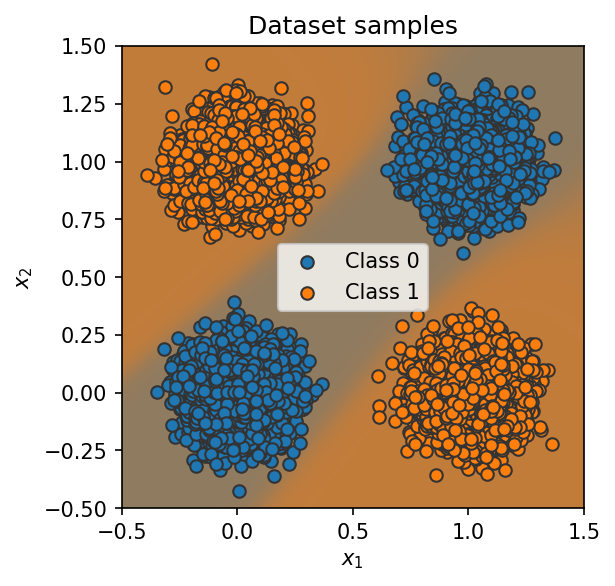

In [103]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4, 4), dpi=150)
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing="ij")  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None, None] + preds * c1[
        None, None
    ]  # Specifying "None" in a dimension creates a new one
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig


_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

#### Mini-Batch Training

Before we use the epoch loop to train the model, we will introduce the concept of batch training. With epoch training, gradients are calculated and averaged across all samples in the dataset for a single update. This is also called batch training with a batch size equal to the size of the dataset. However, this is computationally expensive and not necessary. It's not efficient or even feasible for large datasets.

Therefore, instead of updating the model parameters with the entire dataset, we update the parameters after a **mini-batch of data points**.

The batch size refers to the number of data points used in each update step. A larger batch size can speed up training, but it can also require more memory. In PyTorch, we can define a data loader to load the data in batches. The data loader provides an iterator that returns a batch of data points and labels in each iteration. We can define a data loader as follows:


In [104]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
train_loader

In [107]:
print("Number of batches:", len(train_loader))

Number of batches: 625


In [108]:
# batch training loop
def train_model_batch(model, optimizer, train_loader, loss_func, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        # here the gradient will be updated after each batch
        for batch_data, batch_labels in train_loader:

            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)

            preds = model(batch_data)
            preds = preds.squeeze()
            loss = loss_func(preds, batch_labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Multiply by batch size to scale loss
            epoch_loss += loss.item() * batch_data.size(0)

        # Average loss for epoch
        epoch_loss = epoch_loss / len(train_loader.dataset)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss}")

In [109]:
# call the batch training function
train_model_batch(model, optimizer, train_loader, loss_func)

Epoch 0, Loss: 0.0026812074011191727
Epoch 10, Loss: 0.0025376368634402752
Epoch 20, Loss: 0.002420054851472378
Epoch 30, Loss: 0.002316014891862869
Epoch 40, Loss: 0.0022223551370203496
Epoch 50, Loss: 0.002136982131563127
Epoch 60, Loss: 0.00205874530877918
Epoch 70, Loss: 0.001986599971074611
Epoch 80, Loss: 0.0019198035505600273
Epoch 90, Loss: 0.0018578915008343757


In [110]:
# evaluate the model
def eval_model(model, test_data, test_label):
    model.eval()
    true_preds, num_preds = 0, 0

    # Deactivate gradients for the following code, as we do not need them for inference
    with torch.no_grad():
        test_data, test_label = test_data.to(device), test_label.to(device)
        preds = model(test_data)
        preds = preds.squeeze()
        pred_labels = (preds >= 0.5).long()

        true_preds += (pred_labels == test_label).sum()
        num_preds += test_label.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")


eval_model(model, test_data, test_label)

Accuracy of the model: 100.00%


## Optional Application: RNN for Image Classification

<div style="text-align:center">
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSiMstqkE9hTYmhPD3KMeFRNNKYA2NnrCayahBOEL1TalRqaWF7rH8a7O-nP9c-mKOdZRsWtmAGZfNN/pub?w=969&h=368" style="width:700pt">
</div>

Let's try to build an image classifier using the MNIST dataset. The MNIST dataset consists of images that contain **hand-written numbers from 1–10**. Essentially, we want to build **a classifier to predict the numbers displayed by a set of images**.


### Dataset

Before building the RNN-based computation graph, let's import the MNIST dataset, split it into test and train portions, do a few transformations, and further explore it. You will need the following PyTorch libraries and lines of code to download and import the MNIST dataset to Google Colab.


In [11]:
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor()]
)  # this is to convert the data to PyTorch tensors

# download and load training dataset
trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
# download and load testing dataset
testset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [8]:
for data, label in trainloader:
    print(data.shape, label.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


here, 64 refers to the number of images in each batch (batch size). 1 refers to the number of channels in each image (MNIST images are grayscale, so they have only one channel). 28 and 28 refer to the height and width of each image, respectively. So basically, for the model, we have **input images of size 28x28 pixels**, and we are feeding 64 images at a time to the model.


In [9]:
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

### Model

This is a commonly used RNN architecture. The input to the RNN is a sequence of vectors, and the output is a single vector. The RNN processes the input sequence and produces the output vector. The output vector is then passed through a fully connected layer (aka feedforward neural network) to produce the final output.

<div style="text-align:center">
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQWhELhewvq_bHgqwf4vwDb5B9DN9-jAxeTF9Y73zr-OsW6OXC-ngxAfojivXyZEhjzLXceTZU2Ncz3/pub?w=550&h=600" style="width:500pt">
</div>


In [16]:
class SimpleRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(SimpleRNN, self).__init__()

        self.n_neurons = 200  # number of neurons in the RNN layer
        self.batch_size = 64  # batch size
        self.n_steps = 28  # number of time steps in the RNN layer, in our case, it is 28 because we have 28 vectors, each of which has 28 elements
        self.n_inputs = 28  # number of input features in the RNN layer
        self.n_outputs = 10  # number of output features in the RNN layer that will be passed to the FC layer

        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons)  # create an RNN layer
        self.FC = nn.Linear(
            self.n_neurons, self.n_outputs
        )  # create a fully connected layer

    # hidden state initialization, understand it as the memory of the RNN that will be passed from one time step to the next
    def init_hidden(
        self,
    ):
        # (num_layers, batch_size, n_neurons)
        return torch.zeros(1, self.batch_size, self.n_neurons)

    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs. This is required by the RNN layer, see the documentation (https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
        X = X.permute(
            1, 0, 2
        )  # in this case, because the input is actually 64 X 28 X 28, we need to permute it to 28 X 64 X 28

        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        self.hidden = self.hidden.to(device)

        # rnn_out => n_steps, batch_size, n_neurons (hidden states for each time step)
        # self.hidden => 1, batch_size, n_neurons (final state from each lstm_out)
        rnn_out, self.hidden = self.basic_rnn(X, self.hidden)
        out = self.FC(self.hidden)

        return out.view(-1, self.n_outputs)  # batch_size X n_output

In [17]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = SimpleRNN(64, 28, 28, 200, 10)
model.to(device)
loss_func = (
    nn.CrossEntropyLoss()
)  # loss function, here it automatically applies softmax
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


def get_accuracy(logit, target, batch_size):
    """Obtain accuracy for training round"""
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size
    return accuracy.item()


for epoch in range(100):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()

    # TRAINING ROUND
    for i, data in enumerate(trainloader):
        # reset hidden states
        model.hidden = model.init_hidden()

        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(-1, 28, 28)

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, 64)

    model.eval()
    print(
        "Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f"
        % (epoch, train_running_loss / i, train_acc / i)
    )

Epoch:  0 | Loss: 2.1586 | Train Accuracy: 21.57
Epoch:  1 | Loss: 1.2264 | Train Accuracy: 57.72
Epoch:  2 | Loss: 0.7210 | Train Accuracy: 77.51
Epoch:  3 | Loss: 0.5099 | Train Accuracy: 84.70
Epoch:  4 | Loss: 0.3872 | Train Accuracy: 88.42
Epoch:  5 | Loss: 0.3284 | Train Accuracy: 90.39
Epoch:  6 | Loss: 0.2572 | Train Accuracy: 92.63
Epoch:  7 | Loss: 0.2214 | Train Accuracy: 93.58
Epoch:  8 | Loss: 0.1960 | Train Accuracy: 94.41
Epoch:  9 | Loss: 0.1760 | Train Accuracy: 94.88
Epoch:  10 | Loss: 0.1601 | Train Accuracy: 95.39
Epoch:  11 | Loss: 0.1474 | Train Accuracy: 95.71
Epoch:  12 | Loss: 0.1369 | Train Accuracy: 96.09
Epoch:  13 | Loss: 0.1277 | Train Accuracy: 96.34
Epoch:  14 | Loss: 0.1220 | Train Accuracy: 96.48
Epoch:  15 | Loss: 0.1129 | Train Accuracy: 96.77
Epoch:  16 | Loss: 0.1086 | Train Accuracy: 96.97
Epoch:  17 | Loss: 0.1032 | Train Accuracy: 97.00
Epoch:  18 | Loss: 0.1120 | Train Accuracy: 96.96
Epoch:  19 | Loss: 0.0951 | Train Accuracy: 97.34
Epoch:  20

In [19]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, 64)

print("Test Accuracy: %.2f" % (test_acc / i))

Test Accuracy: 98.38


# Exercise

<b>Note: The Exercises in this tutorial are for your practice only. They will not be graded.</b>

## A Multi-class Classification Problem

**Dataset**: Make a multi-class classification dataset with [CS231n](https://cs231n.github.io/neural-networks-case-study/).

- For consistency, the dataset should have 100000 samples and a `random_state=42` (keeps the same in the whole notebook exercises).

**RUN BELOW CODES!**


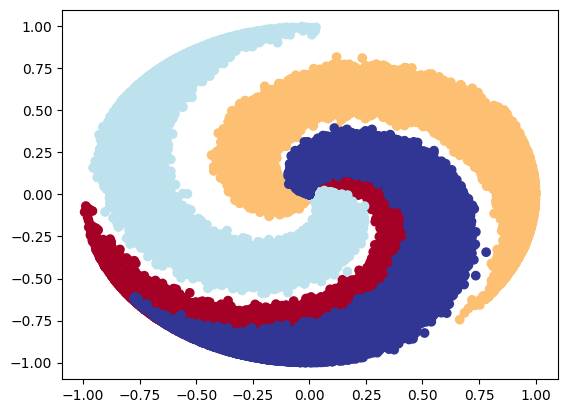

In [51]:
import pandas as pd
import numpy as np


RANDOM_SEED = 42


np.random.seed(RANDOM_SEED)
N = 100000  # number of points per class
D = 2  # dimensionality
K = 4  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype="uint8")  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

**Q1: Data Preprocessing**

- Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

- Create a DataLoader for the training and test sets using `torch.utils.data.DataLoader` and `torch.utils.data.TensorDataset`. Set the batch size to 64.


In [52]:
# Create a dataset and dataloader
import torch

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

**Q2: Model Construction**

Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
You might build the model using below structure:

- Input layer
- One hidden layer with 32 neurons and ReLU activation function
- One hidden layer with 16 neurons and ReLU activation function
- One output layer with 4 neurons (since we have 4 classes) and softmax activation function (it has been combined with the loss function in PyTorch so we don't need to specify it separately).

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.


In [63]:
import torch.nn as nn
import torch.nn.functional as F


class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
        self.input_layer = nn.Linear(2, 32)
        self.hidden_layer1 = nn.Linear(32, 16) 
        self.hidden_layer2 = nn.Linear(16, 4)  # this is the output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer1(x))
        x = self.hidden_layer2(x)
        return x

model = MyModel()

In [64]:
print(model)

MyModel(
  (input_layer): Linear(in_features=2, out_features=32, bias=True)
  (hidden_layer1): Linear(in_features=32, out_features=16, bias=True)
  (hidden_layer2): Linear(in_features=16, out_features=4, bias=True)
  (relu): ReLU()
)


**Q3: Loss Function and Optimizer**

Define a loss function and an optimizer for the model you built in 2. Use `CrossEntropyLoss` as the loss function and `SGD` as the optimizer (set `learning rate` as `0.01`).


In [65]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

**Q4: Training Loop**

- Train the model using the batches you created in 4.
- Use the model you built in 2
- Use the loss function and the optimizer you defined in 3.
- Train the model for 20 epochs.
- Print the loss of the model for each epoch.


In [69]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

def train_model(model, optimizer, train_loader, loss_func, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_data, batch_labels in train_loader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
            preds = model(batch_data)
            preds = preds.squeeze()
            loss = loss_func(preds, batch_labels.long())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * batch_data.size(0)

        epoch_loss = epoch_loss / len(train_loader.dataset)
        print(f"Epoch {epoch}, Loss: {epoch_loss}")

In [70]:
train_model(model, optimizer, train_loader, loss_func, num_epochs=20)

Epoch 0, Loss: 1.3767678563594818
Epoch 1, Loss: 1.3490449534893036
Epoch 2, Loss: 1.3104899307727813
Epoch 3, Loss: 1.2532174760341643
Epoch 4, Loss: 1.1849911558628081
Epoch 5, Loss: 1.1194672627925872
Epoch 6, Loss: 1.0684887101650238
Epoch 7, Loss: 1.033554447889328
Epoch 8, Loss: 1.00962527654171
Epoch 9, Loss: 0.9915794150829316
Epoch 10, Loss: 0.9762448532342911
Epoch 11, Loss: 0.9618641359329224
Epoch 12, Loss: 0.9474444557666779
Epoch 13, Loss: 0.9323934173345566
Epoch 14, Loss: 0.9163566785573959
Epoch 15, Loss: 0.899155907869339
Epoch 16, Loss: 0.8807876122951508
Epoch 17, Loss: 0.8613748348474503
Epoch 18, Loss: 0.8411351382732392
Epoch 19, Loss: 0.820317779803276


**Q5: Evaluation**

- Evaluate the model on the test set.
- Calculate the accuracy of the model on the test set.


In [75]:
def eval_model(model, test_loader):
    model.eval()
    true_preds, num_preds = 0, 0
    with torch.no_grad():
        for batch_data, batch_labels in test_loader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
            preds = model(batch_data)
            preds = preds.squeeze()
            pred_labels = (preds >= 0.5).long()
            true_preds += (pred_labels == batch_labels.unsqueeze(1)).sum() # unsqueeze to match the shape of pred_labels
            num_preds += batch_labels.shape[0]
    acc = true_preds / num_preds

    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

eval_model(model, test_loader)

Accuracy of the model: 97.42%
